In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def define_data_type(data):
    data['User Id'] = data['User Id'].astype('object')
    data['Condition'] = data['Condition'].astype('object')
    
    return data


thermalpref_random = define_data_type(pd.read_csv('../data/bca_thermalpref_train_mode_random_data.csv'))
thermalpref_al = define_data_type(pd.read_csv('../data/bca_thermalpref_train_mode_al_data.csv'))
thermalacc_random = define_data_type(pd.read_csv('../data/bca_thermalacc_train_mode_random_data.csv'))
thermalacc_al = define_data_type(pd.read_csv('../data/bca_thermalacc_train_mode_al_data.csv'))
airpref_random = define_data_type(pd.read_csv('../data/bca_airpref_train_mode_random_data.csv'))
airpref_al = define_data_type(pd.read_csv('../data/bca_airpref_train_mode_al_data.csv'))

thermalpref_random.head()

,Unnamed: 0,Mode,Indoor Temp,Indoor Humidity,Air Velocity,Globe Temperature,Outdoor Temp,Outdoor Humidity,Thermal Preference,User Id,Condition
0,0,NV,28.078668,73.871628,1.03,28.85,90.000000,56.000000,No Change,26.0,19.0
1,1,AC,25.173296,70.359755,0.04,26.30,83.000000,73.000000,Cooler,5.0,1.0
2,2,NV,27.317663,77.619818,0.05,28.20,90.000000,58.000000,Cooler,29.0,16.0
3,3,NV,27.073519,79.363115,0.36,28.10,88.000000,62.000000,No Change,11.0,19.0
4,4,NV,25.862772,67.220795,0.84,26.15,89.454174,62.545826,No Change,36.0,18.0


In [3]:
thermalpref_random.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          114 non-null    int64  
 1   Mode                114 non-null    object 
 2   Indoor Temp         114 non-null    float64
 3   Indoor Humidity     114 non-null    float64
 4   Air Velocity        114 non-null    float64
 5   Globe Temperature   114 non-null    float64
 6   Outdoor Temp        114 non-null    float64
 7   Outdoor Humidity    114 non-null    float64
 8   Thermal Preference  114 non-null    object 
 9   User Id             114 non-null    object 
 10  Condition           114 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 9.9+ KB


In [4]:
def compare_data_distribution(rand_data, al_data, column_name, task='Thermal Preference'):
    """
    Generate and save side-by-side plots for the specified column in two dataframes.

    Parameters:
        rand_data: pandas.DataFrame
            First dataframe.
        al_data: pandas.DataFrame
            Second dataframe.
        column_name: str
            Name of the column to plot.
        save_path: str
            File path to save the generated graph.

    Returns:
        None
    """
    # Check the data type of the specified column in one of the dataframes
    dtype1 = rand_data[column_name].dtype
    dtype2 = al_data[column_name].dtype

    if dtype1 == 'object':
        # If the column is categorical, plot grouped bar graphs side by side
        rand_feature = rand_data[column_name]
        al_feature = al_data[column_name]

        # Count unique values in each dataset
        rand_counts = rand_feature.value_counts(normalize=True).sort_index()
        rand_counts *= 100
        al_counts = al_feature.value_counts(normalize=True).sort_index()
        al_counts *= 100
        if column_name=='Condition': 
            rand_counts.index = ['AC-C1','AC-C2','AC-C3','AC-C4','NV-C16','NV-C17','NV-C18','NV-C19']
            al_counts.index = ['AC-C1','AC-C2','AC-C3','AC-C4','NV-C16','NV-C17','NV-C18','NV-C19']

        # Create a DataFrame with normalized counts
        data = pd.DataFrame({'Random Sampling': rand_counts, 'Active Learning': al_counts})

        # Plot the grouped bar graph
        data.plot(kind='bar', stacked=False, width=0.8, figsize=(8, 6))
        
    else:
        # If the column is numerical, create density curves overlapping each other
        rand_feature = rand_data[column_name]
        al_feature = al_data[column_name]

        plt.figure(figsize=(8, 6))
        sns.kdeplot(rand_feature, label='Random Sampling', color='blue', shade=True)
        sns.kdeplot(al_feature, label='Active Learning', color='green', shade=True)
        
    plt.title(f'Distribution of Selected {column_name}s - {task}', fontsize=15)
    plt.xlabel(column_name, fontsize=15)
    plt.ylabel('Percentage (%)', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylim(0, 23)
    plt.legend(fontsize=15)

    # Save the graph locally
#     plt.savefig(f'{task} {column_name} Random vs AL.png', dpi=600, bbox_inches='tight')
    plt.show()
    
    

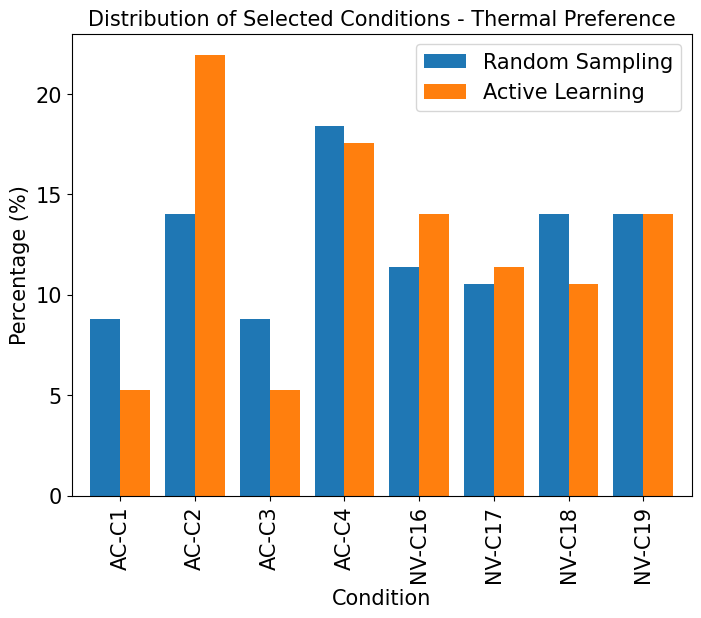

In [5]:
compare_data_distribution(thermalpref_random, thermalpref_al, 'Condition', 'Thermal Preference')

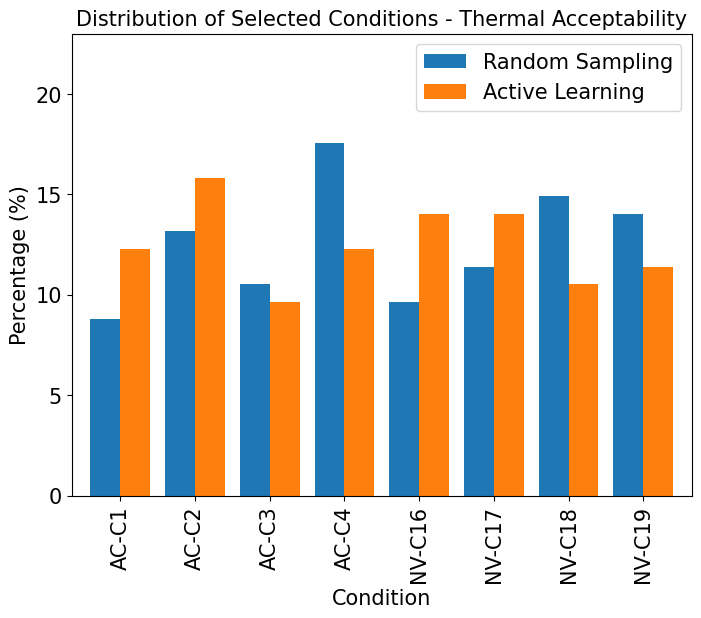

In [6]:
compare_data_distribution(thermalacc_random, thermalacc_al, 'Condition', 'Thermal Acceptability')

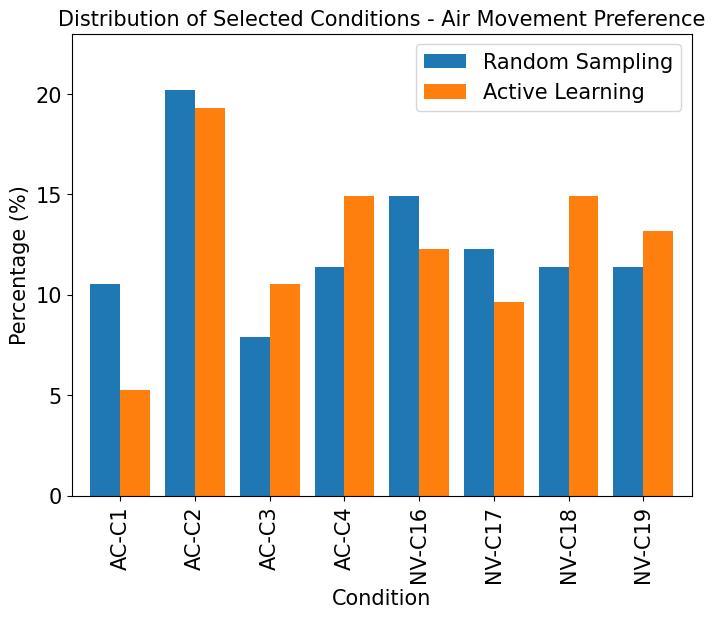

In [7]:
compare_data_distribution(airpref_random, airpref_al, 'Condition', 'Air Movement Preference')

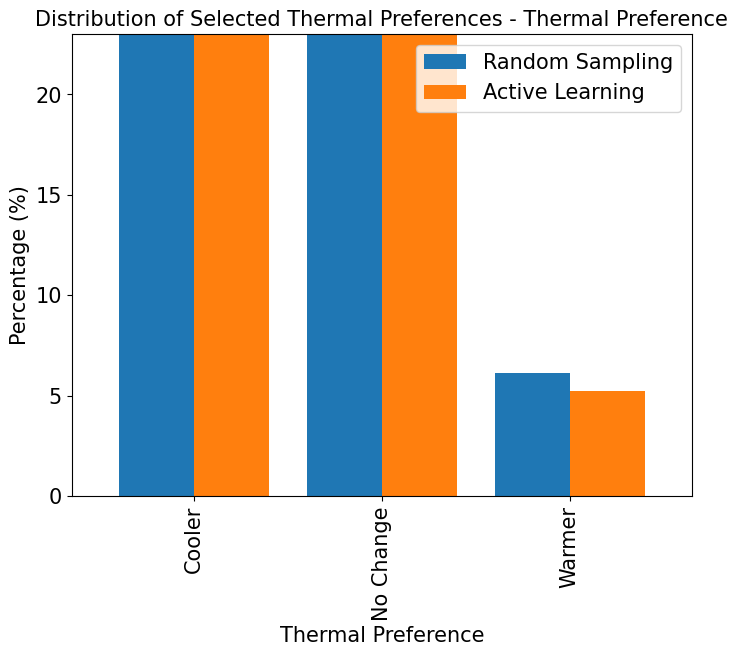

In [8]:
compare_data_distribution(thermalpref_random, thermalpref_al, 'Thermal Preference')

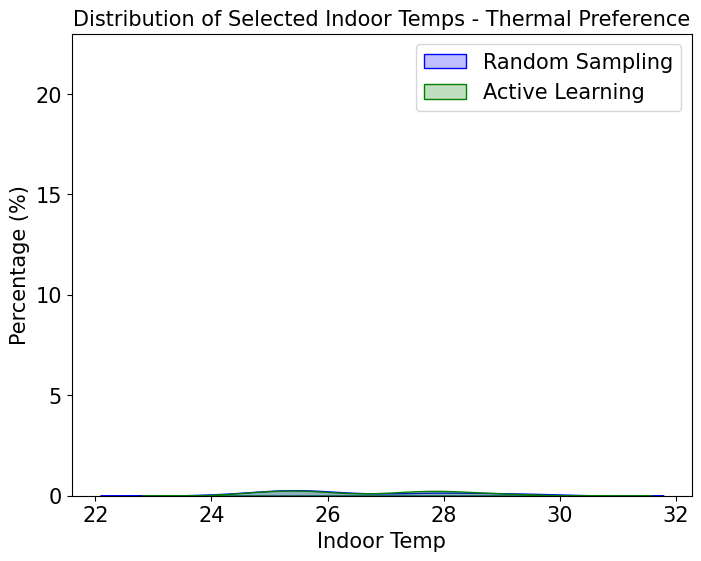

In [9]:
compare_data_distribution(thermalpref_random, thermalpref_al, 'Indoor Temp')

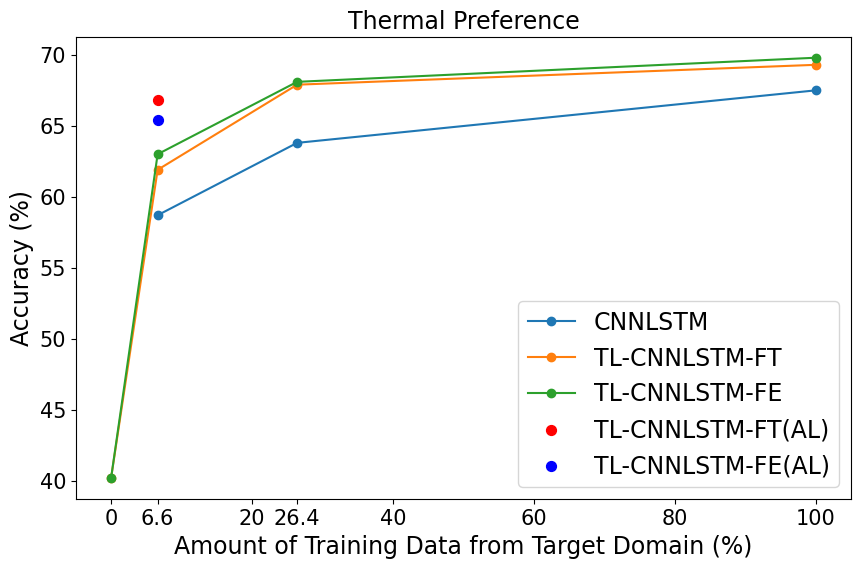

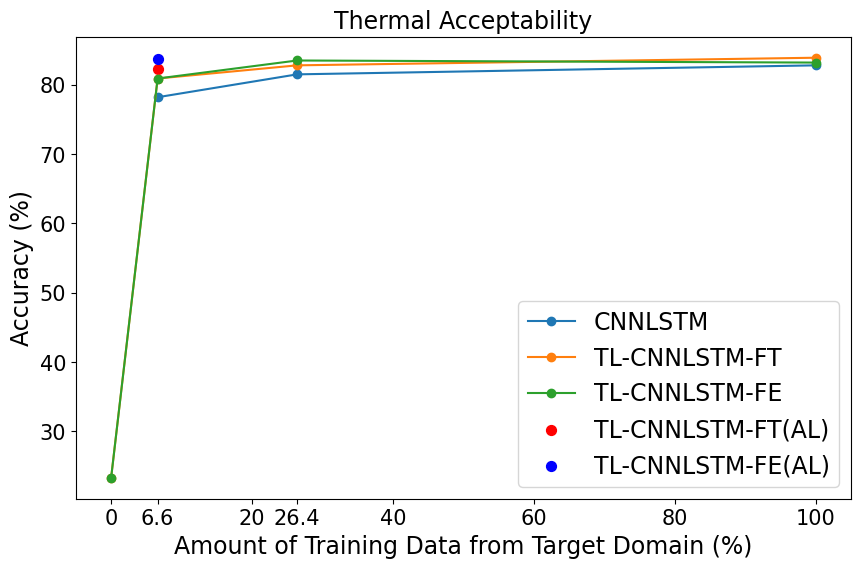

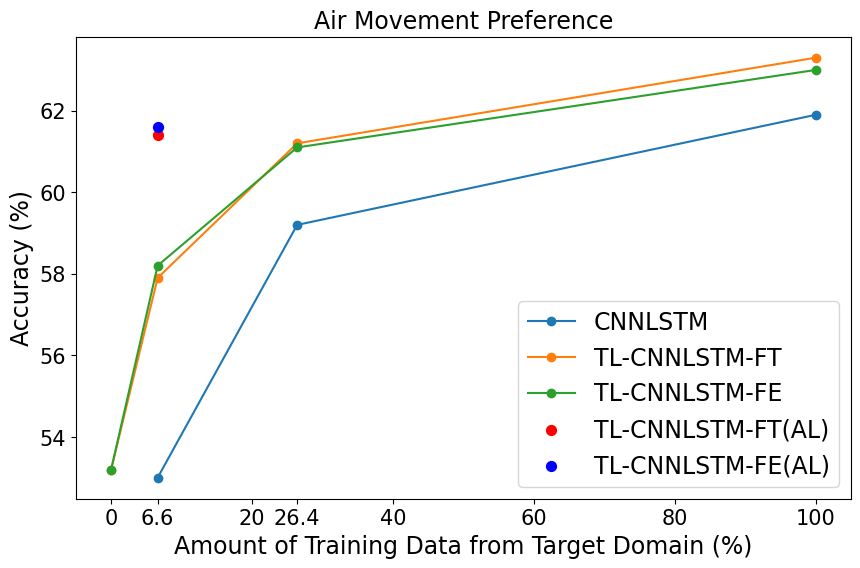

In [10]:
AL_results = {
    'Thermal Preference':{'FT':66.8,'FE':65.3},
    'Thermal Acceptability':{'FT':82.3,'FE':82.8},
    'Air Movement Preference':{'FT':60.4,'FE':61.1}
}

AL_results = {
    'Thermal Preference':{'FT':66.8,'FE':65.4},
    'Thermal Acceptability':{'FT':82.3,'FE':83.7},
    'Air Movement Preference':{'FT':61.4,'FE':61.6}
}

def plot_results(results):
    for task in results['Task'].unique():
        plt.figure(figsize=(10,6))
        
        task_results = results[results['Task']==task]
        for model in task_results['Model'].unique():
            model_results = task_results[task_results["Model"]==model]
            plt.plot(
                model_results['% of Data'], 
                model_results['Accuracy'], 
                label=model,
                marker='o'
            )
            
        # Define the user-defined dot coordinates
        x_coord = 6.6  # X-coordinate
        
        # Plot the user-defined dot
        plt.scatter(x_coord, AL_results[task]['FT'], c='red', marker='o', label='TL-CNNLSTM-FT(AL)', s=50)
        plt.scatter(x_coord, AL_results[task]['FE'], c='blue', marker='o', label='TL-CNNLSTM-FE(AL)', s=50)

        # Get the current tick positions and labels
        current_ticks, current_labels = plt.xticks()

        # Include additional ticks
        new_ticks = list(current_ticks) + [6.6, 26.4]
        new_labels = list(current_labels) + ['6.6', '26.4']

        # Set the x-axis ticks with the new positions and labels
        plt.xticks(new_ticks, new_labels, fontsize=15)
        plt.yticks(fontsize=15)
            
        plt.title(task, fontsize=17)
        plt.xlabel('Amount of Training Data from Target Domain (%)', fontsize=17)
        plt.ylabel('Accuracy (%)', fontsize=17)
        plt.xlim(-5,105)
#         if task == 'Thermal Acceptability':
#             plt.ylim(75, 85)
        plt.legend(fontsize=17)
        plt.savefig(f'{task} Results.png', dpi=600, bbox_inches='tight')
        plt.show()
                    
results = pd.read_excel('../data/results.xlsx', 'Sheet1')
plot_results(results)

In [11]:
ashrae= pd.read_csv('../data/ashrae_db_metadata.csv')
ashrae.head()

,building_id,building_id_inf,contributor,publication,region,country,city,lat,lon,climate,...,records,has_age,has_ec,has_timestamp,timezone,met_source,isd_station,isd_distance,database,quality_assurance
0,1,no,David Rowe,NaN,oceania,australia,sydney,-33.868820,151.209295,humid subtropical,...,170,no,no,yes,Australia/Sydney,rp884,947680-99999,2.3,1.0,pass
1,2,no,David Rowe,NaN,oceania,australia,sydney,-33.868820,151.209295,humid subtropical,...,83,no,no,yes,Australia/Sydney,rp884,947680-99999,2.3,1.0,pass
2,3,no,Fred Baumann,NaN,americas,usa,grand rapids,42.963360,-85.668086,humid midlatitude,...,85,no,no,yes,America/Detroit,rp884,726350-94860,14.9,1.0,pass
3,4,no,David Rowe,NaN,oceania,australia,sydney,-33.868820,151.209295,humid subtropical,...,137,no,no,yes,Australia/Sydney,NaN,947680-99999,2.3,1.0,pass
4,5,no,Gail Brager,"Benton, C. C. & Brager, G. S. Advanced Custome...",americas,usa,auburn,32.609857,-85.480783,mediterranean,...,128,no,no,yes,America/Chicago,rp884,722288-99999,2.1,1.0,pass


In [12]:
ashrae['climate'].unique()

array(['humid subtropical', 'humid midlatitude', 'mediterranean',
       'west coast marine', 'hot arid', 'tropical savanna',
       'temperature marine', 'continental subarctic', 'wet equatorial',
       'tropical wet savanna', 'desert (hot arid)',
       'semi arid midlatitude', 'semi arid high altitude',
       'hot-summer mediterranean', 'temperate oceanic', 'temperate',
       'hot semi-arid', 'monsoon-influenced humid subtropical',
       'monsoon-influenced temperate oceanic', 'tropical rainforest',
       'subtropical hot and dry',
       'monsoon-influenced hot-summer humid continental',
       'cold semi-arid', 'hot desert', 'tropical monsoon',
       'warm-summer mediterranean', 'cool-summer mediterranean',
       'subtropical highland', 'tropical dry savanna', 'tropical',
       'warm-summer\xa0humid continental'], dtype=object)